## 로이터 뉴스 데이터 (1) 데이터 확인하기

In [1]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

print('=3')

=3


In [2]:
# 훈련되이터 로드
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=10000, test_split=0.2)

2121728/2110848 [==============================] - 0s 0us/step


In [3]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [4]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [5]:
print(y_train[0])
print(y_test[0])

3
3


In [6]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


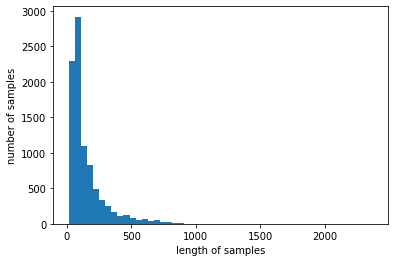

In [7]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

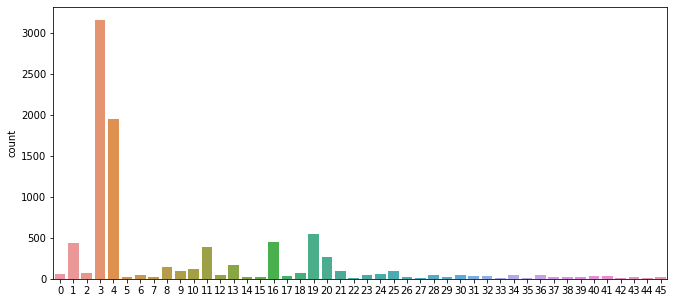

In [8]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [9]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


## 로이터 뉴스 데이터 (2) 데이터 복원하기

In [10]:
word_index = reuters.get_word_index(path="reuters_word_index.json")
print('=3')

565248/550378 [==============================] - 0s 0us/step
=3


In [11]:
word_index['the']

1

In [12]:
index_to_word = { index+3 : word for word, index in word_index.items() }
print('=3')

=3


In [13]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [14]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token
print('=3')

=3


In [15]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [16]:
tok_seq = [4, 587, 23, 133, 6, 30, 515]
print(' '.join([index_to_word[index] for index in tok_seq]))

the transaction is expected to be completed


In [17]:
tok_seq = [4, 12000, 23, 133, 6, 30, 515]
print(' '.join([index_to_word[index] for index in tok_seq]))

the staffing is expected to be completed


In [18]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)

x_train = decoded
print(len(x_train))

8982


In [19]:
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)

x_test = decoded
print(len(x_test))

2246


In [20]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> br and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for o

## 벡터화 하기

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [22]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 9670)


In [23]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 9670)


### 나이브 베이즈 분류기

In [24]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score #정확도 계산

print('=3')

=3


In [25]:
model = MultinomialNB()
model.fit(tfidfv, y_train)

MultinomialNB()

In [26]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

predicted = model.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6567230632235085


In [27]:
x_test[3]

'<sos> <unk> <unk> oil and gas partnership said it completed the sale of interests in two major oil and gas fields to lt energy assets international corp for 21 mln dlrs the company said it sold about one half of its 50 pct interest in the oak hill and north <unk> fields its two largest producing properties it said it used about 20 mln dlrs of the proceeds to <unk> principal on its senior secured notes semi annual principal payments on the remaining 40 mln dlrs of notes have been satisfied until december 1988 as a result it said the company said the note agreements were amended to reflect an easing of some financial covenants and an increase of interest to 13 5 pct from 13 0 pct until december 1990 it said the <unk> exercise price for 1 125 000 warrants was also reduced to 50 cts from 1 50 dlrs the company said energy assets agreed to share the costs of increasing production at the oak hill field reuter 3'

In [28]:
y_test[3]

4

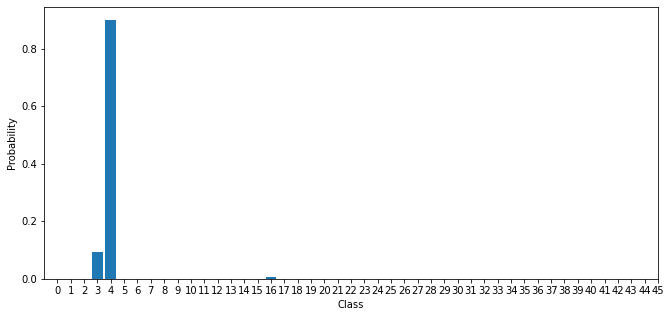

In [29]:
probability_3 = model.predict_proba(tfidfv_test[3])[0]

plt.rcParams["figure.figsize"] = (11,5)
plt.bar(model.classes_, probability_3)
plt.xlim(-1, 21)
plt.xticks(model.classes_)
plt.xlabel("Class")
plt.ylabel("Probability")
plt.show()

In [30]:
model.predict(tfidfv_test[3])

array([4])

##  F1-Score, Confusion Matrix

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print('=3')

=3


In [32]:
print(classification_report(y_test, model.predict(tfidfv_test), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.62      0.69      0.65       105
           2       0.00      0.00      0.00        20
           3       0.81      0.90      0.85       813
           4       0.51      0.96      0.67       474
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00        14
           7       0.00      0.00      0.00         3
           8       0.00      0.00      0.00        38
           9       1.00      0.08      0.15        25
          10       0.00      0.00      0.00        30
          11       0.66      0.63      0.64        83
          12       0.00      0.00      0.00        13
          13       1.00      0.03      0.05        37
          14       0.00      0.00      0.00         2
          15       0.00      0.00      0.00         9
          16       0.69      0.56      0.61        99
          17       0.00    

In [33]:
def graph_confusion_matrix(model, x_test, y_test):#, classes_name):
  df_cm = pd.DataFrame(confusion_matrix(y_test, model.predict(x_test)))#, index=classes_name, columns=classes_name)
  fig = plt.figure(figsize=(12,12))
  heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
  heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=12)
  heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=12)
  plt.ylabel('label')
  plt.xlabel('predicted value')

print('=3')

=3


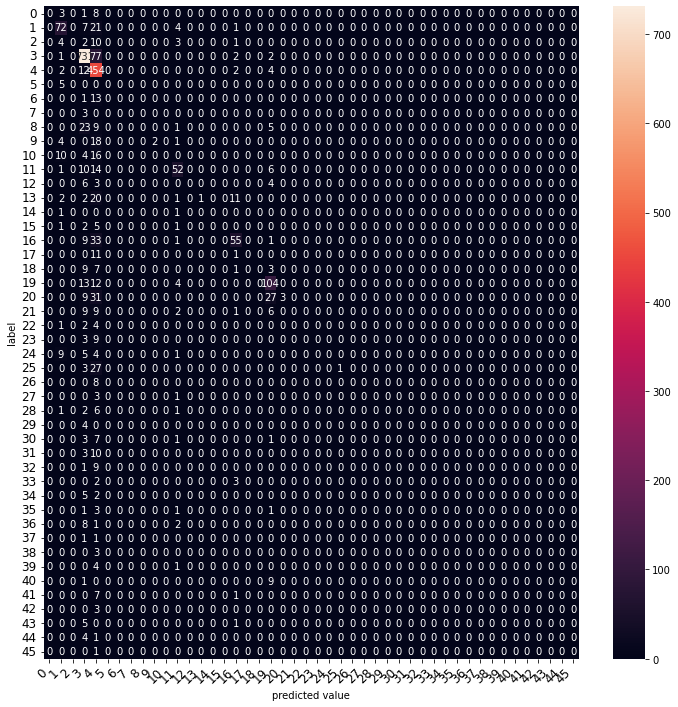

In [34]:
graph_confusion_matrix(model, tfidfv_test, y_test)

## 다양한 머신러닝 모델 사용해보기 (1)

In [35]:
#complemt NB ; used when labels are unbalanced
cb = ComplementNB()
cb.fit(tfidfv, y_train)

ComplementNB()

In [36]:
predicted = cb.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7707034728406055


In [37]:
#Logistic Regression
# 10분 정도 소요됩니다.
lr = LogisticRegression(C=10000, penalty='l2', max_iter=3000)
lr.fit(tfidfv, y_train)

LogisticRegression(C=10000, max_iter=3000)

In [38]:
predicted = lr.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.8107747105966162


In [39]:
# SVM
lsvc = LinearSVC(C=1000, penalty='l1', max_iter=3000, dual=False)
lsvc.fit(tfidfv, y_train)

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC(C=1000, dual=False, max_iter=3000, penalty='l1')

In [40]:
predicted = lsvc.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7849510240427426


## 다양한 머신러닝 모델 사용해보기 (2)

In [41]:
tree = DecisionTreeClassifier(max_depth=10, random_state=0)
tree.fit(tfidfv, y_train)

DecisionTreeClassifier(max_depth=10, random_state=0)

In [42]:
predicted = tree.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.6202137132680321


In [43]:
forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest.fit(tfidfv, y_train)

RandomForestClassifier(n_estimators=5, random_state=0)

In [49]:
predicted = forest.predict(tfidfv_test) #테스트 데이터에 대한 예측
print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.674087266251113


In [50]:
# 15분 정도 소요될 수 있습니다.
# grbt = GradientBoostingClassifier(random_state=0) # verbose=3
# grbt.fit(tfidfv, y_train)

GradientBoostingClassifier(random_state=0)

In [51]:
# predicted = grbt.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

정확도: 0.7662511130899377


In [45]:
# # 20분 이상 소요될 수 있습니다.
# voting_classifier = VotingClassifier(estimators=[
#          ('lr', LogisticRegression(C=10000, max_iter=3000, penalty='l2')),
#         ('cb', ComplementNB()),
#         ('grbt', GradientBoostingClassifier(random_state=0))
# ], voting='soft')
# voting_classifier.fit(tfidfv, y_train)

In [46]:
# predicted = voting_classifier.predict(tfidfv_test) #테스트 데이터에 대한 예측
# print("정확도:", accuracy_score(y_test, predicted)) #예측값과 실제값 비교

# 프로젝트: Vocabulary Size를 변경해서 시도해보기

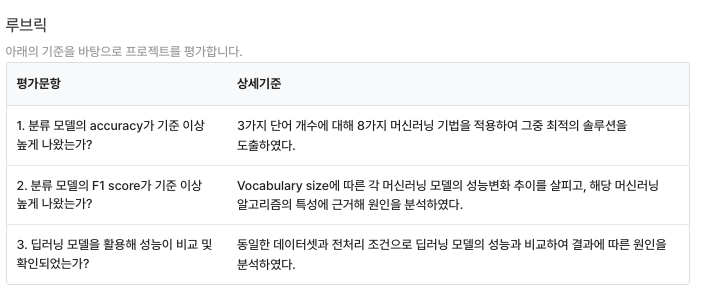

In [1]:
import tensorflow
import matplotlib
import seaborn 
import numpy 
import pandas
import sklearn

from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


print(tensorflow.__version__)
print(matplotlib.__version__)
print(seaborn.__version__)
print(numpy.__version__)
print(pandas.__version__)
print(sklearn.__version__)

2.6.0
3.4.3
0.11.2
1.21.4
1.3.3
1.0


### vocab size 조정

In [2]:
# check vocab size 확인 함수

def check_vocab_size(train,test) :
    all_list = np.concatenate((train, test),axis=0)    
    vocab_set = set()

    for i in all_list :
        vocab_set |= set(i)
    
    return len(vocab_set)

In [3]:
#모든 단어 사용
(xa_train, ya_train), (xa_test, ya_test) = reuters.load_data(num_words=None, test_split=0.2)

In [4]:
# 전체 vocab 사이즈 크기는 30980 으로 나오네요
check_vocab_size(xa_train, xa_test)

30980

In [5]:
# 빈도수 상위 15,000개의 단어만 사용
(xb_train, yb_train), (xb_test, yb_test) = reuters.load_data(num_words=15000, test_split=0.2)

In [6]:
# 전체 vocab 사이즈에서 2개가 빠질까? 여기도 그러네요
check_vocab_size(xb_train, xb_test)

14998

In [7]:
# 빈도수 상위 5,000개의 단어만 사용
(xc_train, yc_train), (xc_test, yc_test) = reuters.load_data(num_words=5000, test_split=0.2)

In [8]:
# 전체 vocab 사이즈에서 2개가 빠질까?
check_vocab_size(xc_train, xc_test)

4998

In [9]:
# decode token seq 
index_word ={ i+3 : w for w, i in reuters.get_word_index().items()}
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
    index_word[index]=token
print('=3')

def decode_seq(token) :
    decode = []
    for i in token :
        decode.append(index_word[i])
    
    return ' '.join(decode)

=3


In [10]:
for i,corpus_seq in enumerate([xa_train,xb_train,xc_train]) :
    vocab_type = {1:'all', 2:'15000', 3:'5000'}
    
    print(f'vocab_size tye : {vocab_type[i+1]}')
    print(decode_seq(corpus_seq[2]))
    
    print('\n\n')

vocab_size tye : all
<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1987 per share amounts are calculated after preferred stock dividends loss continuing operations for the qtr 1986 includes gains of sale of investments in enron corp of 14 mln dlrs and associated companies of 4 189 000 less writedowns of investments in national intergroup inc of 11 8 mln and brae corp of 15 6 mln reuter 3



vocab_size tye : 15000
<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two for one split effective january 6 1

In [11]:
def i2w_token(token) :
    return [decode_seq(i) for i in token] 

In [12]:
# i2w for vectorization 
xa_tr = i2w_token(xa_train)
xa_ts = i2w_token(xa_test)

xb_tr = i2w_token(xb_train)
xb_ts = i2w_token(xb_test)

xc_tr = i2w_token(xc_train)
xc_ts = i2w_token(xc_test)


### Vectorization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
print('=3')

=3


In [14]:
def tfidf_vectorization(x_train, x_test) :

    # DTM
    dtf = CountVectorizer()
    x_train = dtf.fit_transform(x_train)
    x_test = dtf.transform(x_test)
    
    #TF-IDF
    tfidfvector = TfidfTransformer()
    x_train = tfidfvector.fit_transform(x_train)
    x_test = tfidfvector.transform(x_test)
    
    print('train shape: ', x_train.shape)
    print('test shape: ', x_test.shape)
    print()
    
    return x_train, x_test, tfidfvector

In [15]:
print('vocab size : all')
xa_tr_v, xa_ts_v, tfidfvector= tfidf_vectorization(xa_tr, xa_ts)
print('vocab size : 15000')
xb_tr_v, xb_ts_v, tfidfvector= tfidf_vectorization(xb_tr, xb_ts)
print('vocab size : 5000 ')
xc_tr_v, xc_ts_v, tfidfvector= tfidf_vectorization(xc_tr, xc_ts)

vocab size : all
train shape:  (8982, 26506)
test shape:  (2246, 26506)

vocab size : 15000
train shape:  (8982, 14227)
test shape:  (2246, 14227)

vocab size : 5000 
train shape:  (8982, 4867)
test shape:  (2246, 4867)



### Modeling and Evaluating Results

In [16]:
from sklearn.naive_bayes import MultinomialNB #다항분포 나이브 베이즈 모델
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import ComplementNB
from sklearn.svm import LinearSVC

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import f1_score

In [17]:
meta_data = {'xa' : {'xtrain' : xa_tr_v, 'xtest' : xa_ts_v, 'ytrain' : ya_train, 'ytest' : ya_test }, 
             'xb' : {'xtrain' : xb_tr_v, 'xtest' : xb_ts_v, 'ytrain' : yb_train, 'ytest' : yb_test },
             'xc' : {'xtrain' : xc_tr_v, 'xtest' : xc_ts_v, 'ytrain' : yc_train, 'ytest' : yc_test }} 

In [50]:
def compare_model_results(model, data) :
    vocab_size = ['xa','xb','xc']
    results = []
    for i in vocab_size :
        model = model
        model.fit(meta_data[i]['xtrain'], meta_data[i]['ytrain'])
        f1score = f1_score( meta_data[i]['ytest'], model.predict(meta_data[i]['xtest']), average='weighted')
        results.append(f1score)
        
    return results

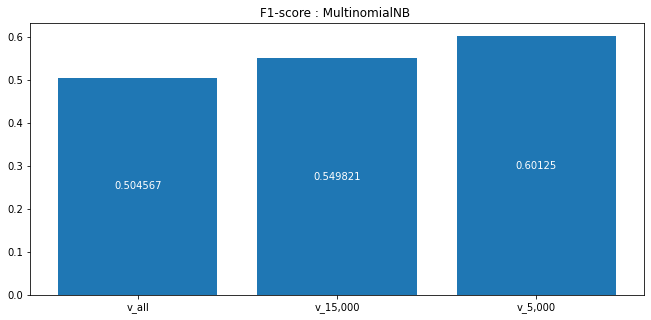

In [262]:
# 1. MultinomialNB

f1 = compare_model_results(MultinomialNB(), meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(['v_all', 'v_15,000', 'v_5,000'],f1)
ax.bar_label(p1,label_type='center', color='white')
plt.title('F1-score : MultinomialNB ')
plt.show()

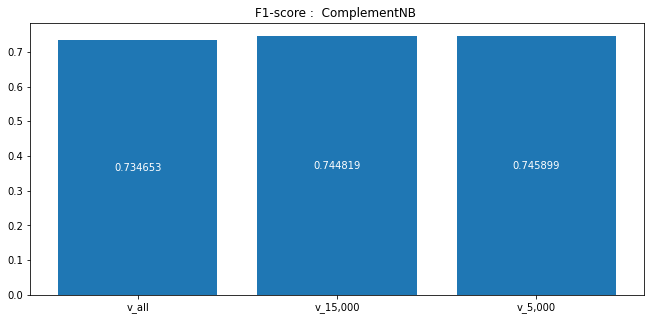

In [263]:
# 2. ComplementNB

f1 = compare_model_results(ComplementNB(), meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(['v_all', 'v_15,000', 'v_5,000'],f1)
ax.bar_label(p1,label_type='center', color='white')
plt.title('F1-score :  ComplementNB ')
plt.show()

/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/svm/_base.py:1199: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


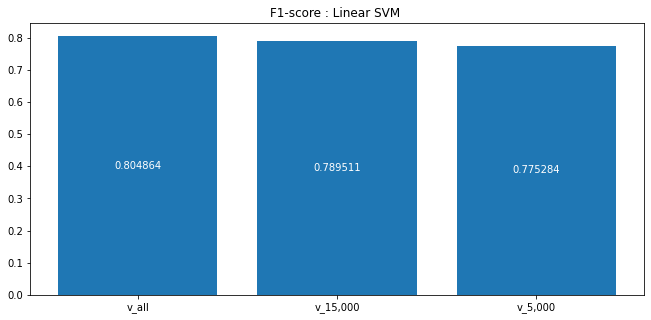

In [264]:
# 3. SVM

model = LinearSVC(C=1000)

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(['v_all', 'v_15,000', 'v_5,000'],f1)
ax.bar_label(p1,label_type='center', color='white')
plt.title('F1-score : Linear SVM ')
plt.show()

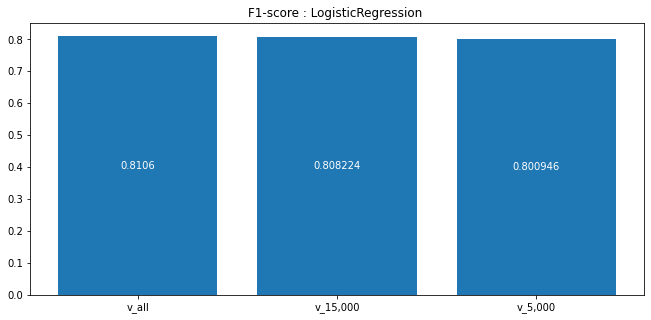

In [268]:
# 4. LogisticRegression
model = LogisticRegression(C=1000, penalty='l2', max_iter=3000)

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(['v_all', 'v_15,000', 'v_5,000'],f1)
ax.bar_label(p1,label_type='center', color='white')
plt.title('F1-score : LogisticRegression ')
plt.show()

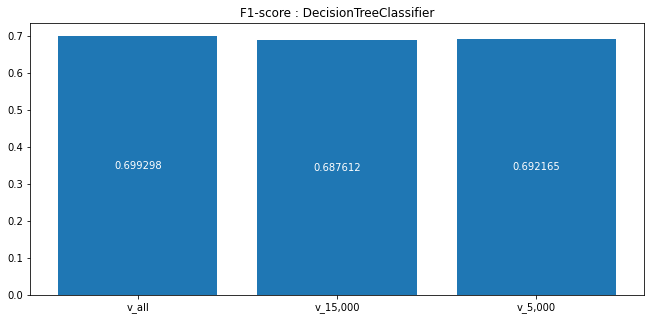

In [265]:
# 5. DecisionTreeClassifier

model = DecisionTreeClassifier()

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(['v_all', 'v_15,000', 'v_5,000'],f1)
ax.bar_label(p1,label_type='center', color='white')
plt.title('F1-score : DecisionTreeClassifier' )
plt.show()

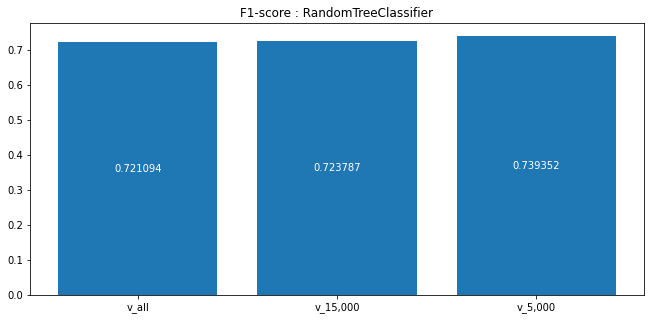

In [266]:
# 6. RandomTreeClassifier

model = RandomForestClassifier(n_estimators=100)

f1 = compare_model_results(model, meta_data)

fig, ax = plt.subplots()

p1 = ax.bar(['v_all', 'v_15,000', 'v_5,000'],f1)
ax.bar_label(p1,label_type='center', color='white')
plt.title('F1-score : RandomTreeClassifier' )
plt.show()

In [52]:
# # 7. GradientBoostingClassifier

# model = GradientBoostingClassifier(random_state=1)

# f1 = compare_model_results(model, meta_data)

# fig, ax = plt.subplots()

# p1 = ax.bar(['v_all', 'v_15,000', 'v_5,000'],f1)
# ax.bar_label(p1,label_type='center', color='white')
# plt.title('F1-score : GradientBoostingClassifier' )
# plt.show()

In [ ]:
# # 8. Voting Classifier

# model = VotingClassifier(estimators=[
#          ('lr', LogisticRegression(C=1000, max_iter=3000, penalty='l2')),
#         ('cb', ComplementNB()),
#         ('grbt', GradientBoostingClassifier(random_state=0))
# ], voting='soft')

# f1 = compare_model_results(model, meta_data)

# fig, ax = plt.subplots()

# p1 = ax.bar(['v_all', 'v_15,000', 'v_5,000'],f1)
# ax.bar_label(p1,label_type='center', color='white')
# plt.title('F1-score : Voting Classifier' )
# plt.show()

In [19]:
# 26506
# 14227

In [22]:
# 9. Neural Network
import tensorflow as tf
word_vector_dim = 16
vocab_size = meta_data['xc']['xtrain'].shape[1]

models = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)),
    tf.keras.layers.LSTM(8),   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(46, activation='softmax'), 
])

models.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          77872     
_________________________________________________________________
lstm_1 (LSTM)                (None, 8)                 800       
_________________________________________________________________
dense_3 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 46)                1518      
Total params: 80,878
Trainable params: 80,878
Non-trainable params: 0
_________________________________________________________________


In [23]:
target = yc_train.copy() #one-hot encoding
num = np.unique(target, axis=0)
num =num.shape[0]
encoding = np.eye(num)[target] 

In [24]:
x_train = xc_tr_v.toarray().copy()
y_train = encoding.copy()

val_size =int(len(x_train) * 0.3) +1 

# validation set 10000건 분리
x_val = x_train[:val_size]   
y_val = y_train[:val_size]

# validation set을 제외한 나머지 
partial_x_train = x_train[val_size:]  
partial_y_train = y_train[val_size:]

print(partial_x_train.shape)
print(partial_y_train.shape)

(6287, 4867)
(6287, 46)


In [25]:
lr = 1e-4
models.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
               
epochs= 25  # 몇 epoch를 훈련하면 좋을지 결과를 보면서 바꾸어 봅시다. 

history0 = models.fit(partial_x_train,
                        partial_y_train,
                        epochs=epochs,
                        batch_size=256,
                        validation_data=(x_val, y_val),
                        verbose=1)

Epoch 1/25
25/25 [==============================] - 6s 168ms/step - loss: 3.8290 - accuracy: 0.0121 - val_loss: 3.8247 - val_accuracy: 0.0186
Epoch 2/25
25/25 [==============================] - 4s 155ms/step - loss: 3.8216 - accuracy: 0.0194 - val_loss: 3.8186 - val_accuracy: 0.3447
Epoch 3/25
25/25 [==============================] - 4s 151ms/step - loss: 3.8156 - accuracy: 0.3547 - val_loss: 3.8128 - val_accuracy: 0.3447
Epoch 4/25
25/25 [==============================] - 4s 149ms/step - loss: 3.8094 - accuracy: 0.3547 - val_loss: 3.8062 - val_accuracy: 0.3447
Epoch 5/25
25/25 [==============================] - 4s 150ms/step - loss: 3.8021 - accuracy: 0.3547 - val_loss: 3.7982 - val_accuracy: 0.3447
Epoch 6/25
25/25 [==============================] - 4s 152ms/step - loss: 3.7929 - accuracy: 0.3547 - val_loss: 3.7880 - val_accuracy: 0.3447
Epoch 7/25
25/25 [==============================] - 4s 151ms/step - loss: 3.7810 - accuracy: 0.3547 - val_loss: 3.7746 - val_accuracy: 0.3447
Epoch 

아주 간단한 RNN 모델로 5,000 vocab 짜리 input으로 신경망으로 분류모델을 돌려봤습니다. 
성능이 확실 안 좋게 나오는 것 같네요. 

모델의 한계가 있는 것 같고, TF-IDF로 임베딩의 한계라고도 볼 수 있을 것 같네요. 

결국 이런 상황에서는 일반 machine learning 모델이 성능이 좋기 때문에, 만약 자원의 한계가 있을 경우는 머신러닝을 이용하는 것이 최선일 수도 있겠다라는 생각이 들었습니다.